In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import tensorflow as tf

In [11]:
x_data = np.linspace(0.0,10.0,1000000)

In [16]:
noise = np.random.randn(len(x_data))

In [17]:
noise

array([-0.25090472,  0.59856747, -0.37857848, ...,  0.46267614,
        0.38072148,  0.06646217])

y = mx + b

b = 5

In [19]:
y_true = (0.5 * x_data) + 5 + noise

In [21]:
y_true

array([ 4.74909528,  5.59857247,  4.62143152, ..., 10.46266614,
       10.38071648, 10.06646217])

In [22]:
x_df = pd.DataFrame(data=x_data,columns=['X Data'])

In [23]:
y_df = pd.DataFrame(data=y_true,columns=['Y'])

In [25]:
my_data = pd.concat([x_df,y_df],axis=1)

In [26]:
my_data.head()

,X Data,Y
0,0.00000,4.749095
1,0.00001,5.598572
2,0.00002,4.621432
3,0.00003,6.013458
4,0.00004,3.382504


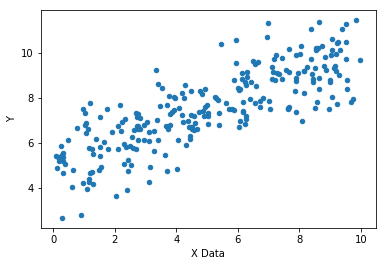

In [28]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')

In [30]:
batch_size = 8

In [31]:
np.random.randn(2)

array([-1.58558753, -1.79646983])

In [32]:
m = tf.Variable(1.58)
b = tf.Variable(1.79)

In [35]:
xph = tf.placeholder(tf.float32,[batch_size])

In [36]:
yph = tf.placeholder(tf.float32,[batch_size])

In [37]:
y_model = m * xph + b

In [39]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [40]:
optimiser = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimiser.minimize(error)

In [41]:
init = tf.global_variables_initializer()

In [51]:
with tf.Session() as sess:
    sess.run(init)
    
    batches = 100000
    
    for i in range(batches):
        range_ind = np.random.randint(len(x_data),size=batch_size)
        
        feed = {xph:x_data[range_ind],yph:y_true[range_ind]}
        
        sess.run(train,feed_dict=feed)
    
    model_m,modelb = sess.run([m,b])

In [52]:
model_m

0.47595385

In [57]:
modelb

4.971623

In [58]:
y_hat = x_data * model_m + modelb

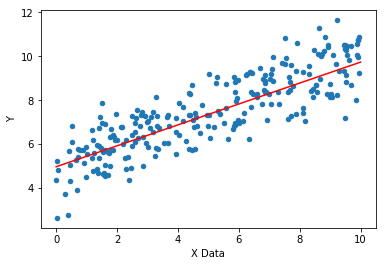

In [61]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(x_data,y_hat,"r")